In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
house = fetch_california_housing()

In [3]:
dir(house)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
df = pd.DataFrame(house.data, columns=house.feature_names)

In [6]:
df["Target"] = house.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
df.drop(["Longitude", "Latitude"], axis=1, inplace=True)

<Axes: >

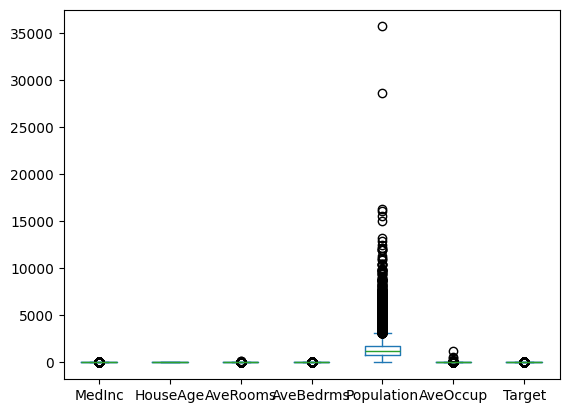

In [11]:
df.plot.box()

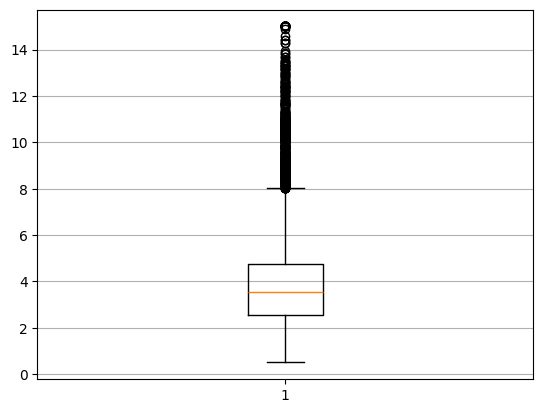

In [12]:
plt.boxplot(df["MedInc"])
plt.grid(axis="y")
plt.show()

In [13]:
df["MedInc"].quantile(0.97)

8.160844999999997

In [14]:
df = df[df["MedInc"]<=df["MedInc"].quantile(0.96)]

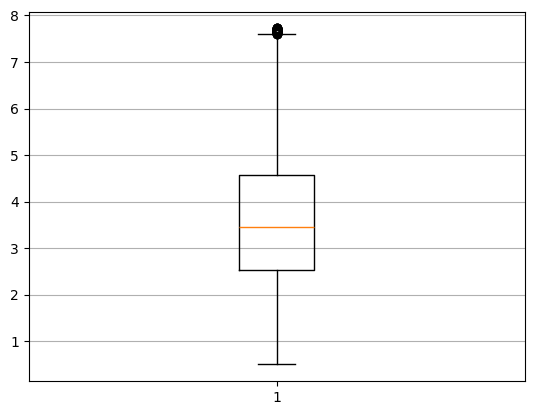

In [15]:
plt.boxplot(df["MedInc"])
plt.grid(axis="y")
plt.show()

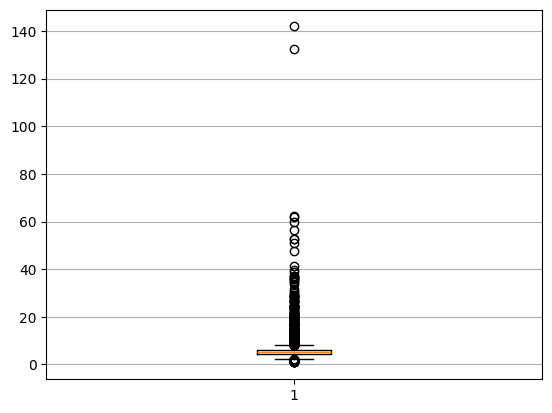

In [16]:
plt.boxplot(df["AveRooms"])
plt.grid(axis="y")
plt.show()

<Axes: >

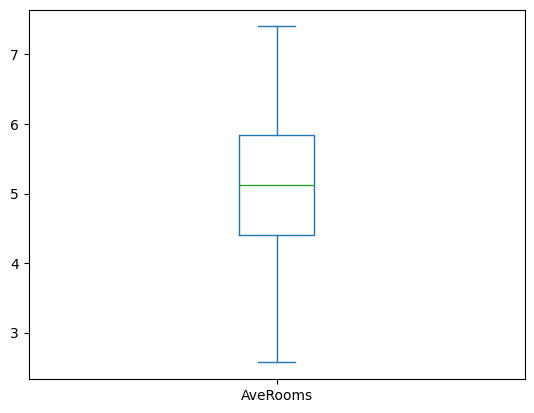

In [18]:
df[(df["AveRooms"]>=df["AveRooms"].quantile(0.01))&
(df["AveRooms"]<=df["AveRooms"].quantile(0.96))]["AveRooms"].plot.box()

In [19]:
df = df[(df["AveRooms"]>=df["AveRooms"].quantile(0.01))&
(df["AveRooms"]<=df["AveRooms"].quantile(0.96))]

<Axes: >

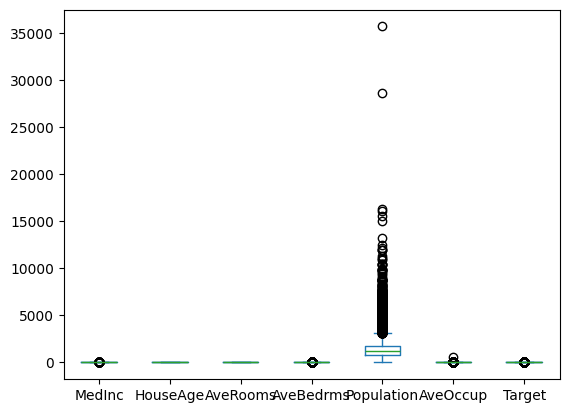

In [20]:
df.plot.box()

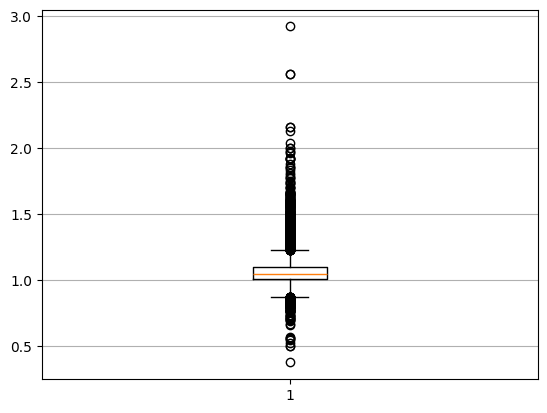

In [21]:
plt.boxplot(df["AveBedrms"])
plt.grid(axis="y")
plt.show()

<Axes: >

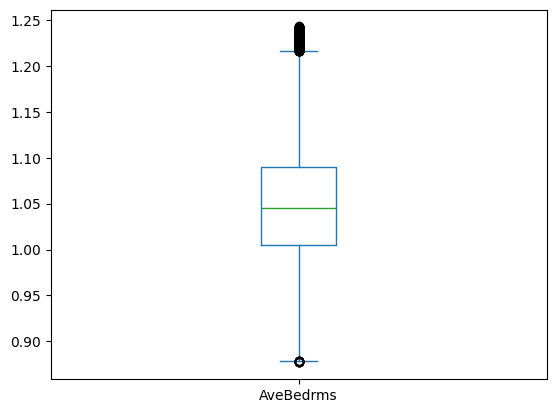

In [22]:
df[(df["AveBedrms"]>=df["AveBedrms"].quantile(0.01))&(df["AveBedrms"]<=df["AveBedrms"].quantile(0.96))]["AveBedrms"].plot.box()

In [23]:
df = df[(df["AveBedrms"]>=df["AveBedrms"].quantile(0.01))&(df["AveBedrms"]<=df["AveBedrms"].quantile(0.96))]

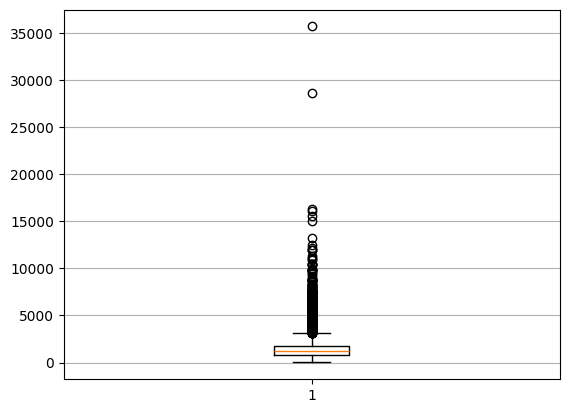

In [24]:
plt.boxplot(df["Population"])
plt.grid(axis="y")
plt.show()

<Axes: >

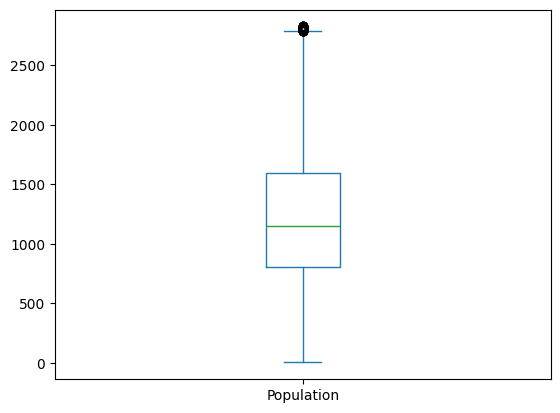

In [25]:
df[df["Population"]<=df["Population"].quantile(0.92)]["Population"].plot.box()

In [26]:
df = df[df["Population"]<=df["Population"].quantile(0.92)]

<Axes: >

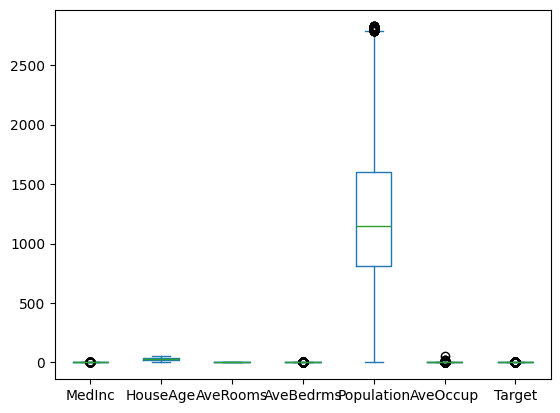

In [27]:
df.plot.box()

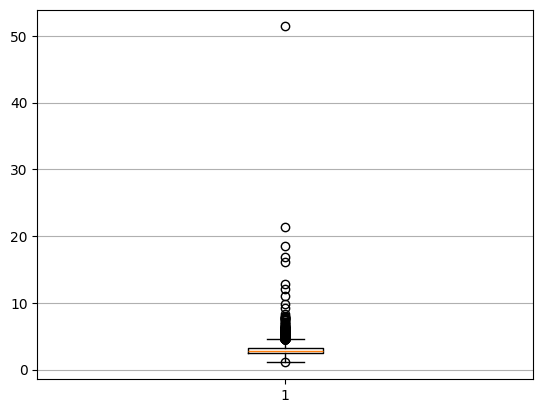

In [28]:
plt.boxplot(df["AveOccup"])
plt.grid(axis="y")
plt.show()

<Axes: >

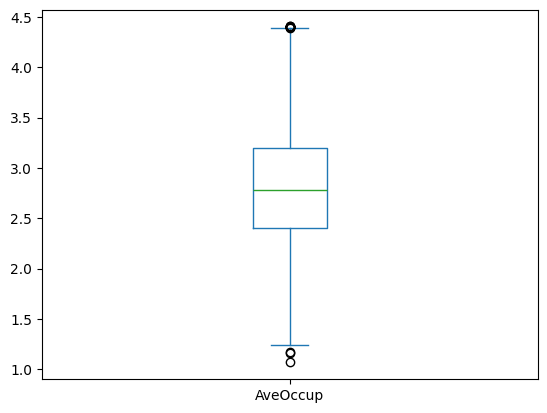

In [29]:
df[df["AveOccup"]<=df["AveOccup"].quantile(0.96)]["AveOccup"].plot.box()

In [30]:
df = df[df["AveOccup"]<=df["AveOccup"].quantile(0.96)]

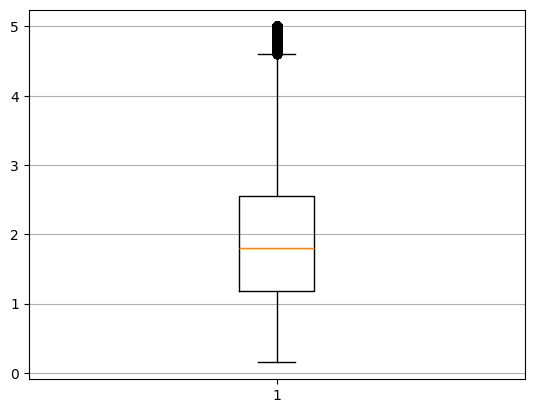

In [31]:
plt.boxplot(df["Target"])
plt.grid(axis="y")
plt.show()

In [32]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Target
count,15794.000000,15794.000000,15794.000000,15794.000000,15794.000000,15794.000000,15794.000000
mean,3.651545,29.981702,5.136112,1.048051,1227.488223,2.819444,1.995182
std,1.402435,12.197404,0.964189,0.066906,577.032408,0.611645,1.056066
min,0.536000,1.000000,2.569488,0.877301,5.000000,1.066176,0.149990
25%,2.580400,20.000000,4.443697,1.002803,803.000000,2.401100,1.185000
50%,3.512500,31.000000,5.139612,1.044374,1139.000000,2.776908,1.796000
75%,4.574375,38.000000,5.820060,1.089598,1582.000000,3.198906,2.550000
max,7.719700,52.000000,7.401180,1.242857,2824.000000,4.406170,5.000010


In [33]:
X = df.drop("Target", axis=1)
y = df["Target"]

In [34]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.75, random_state=234)

In [35]:
model = DecisionTreeRegressor()

In [36]:
model.fit(X_tr, y_tr)

DecisionTreeRegressor()

In [37]:
model.score(X_tr, y_tr)

1.0

In [38]:
y_pred = model.predict(X_te)

In [39]:
r2_score(y_te, y_pred)

0.2726481044918939

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
m = DecisionTreeRegressor()

In [42]:
params = {"criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
         "splitter":["random", "best"],
         "max_depth":[4,5,7, 9,11, 12, 13],
         "min_samples_split":[2,3,4,5],
         "max_features":[2,3,4,5,6]}

In [43]:
gscv = GridSearchCV(param_grid=params, n_jobs=-1, estimator=m, verbose=True, cv=10)

In [44]:
gscv.fit(X_tr, y_tr)

Fitting 10 folds for each of 1120 candidates, totalling 11200 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [4, 5, 7, 9, 11, 12, 13],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['random', 'best']},
             verbose=True)

In [45]:
gscv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_split': 4,
 'splitter': 'best'}

In [46]:
gscv.best_score_

0.5677703613227931

In [47]:
m = DecisionTreeRegressor(criterion="friedman_mse", max_depth=7, max_features=5, 
                         min_samples_split=4, splitter="best")

In [48]:
m.fit(X_tr, y_tr)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=5,
                      min_samples_split=4)

In [49]:
y_pred3 = m.predict(X_te)

In [51]:
r2_score(y_te, y_pred3)

0.5553723867416387